In [1]:
import numpy as np
import pandas as pd

In [2]:
data_15 = pd.read_csv('data_15_label.csv')

In [3]:
data_15.shape

(374147, 29)

In [4]:
data_15 = data_15[(data_15.power<2.3)&(data_15.wind_speed<2.2)&(data_15.environment_tmp<2)&(data_15.int_tmp<2)]

In [5]:
data_15 = data_15.drop(columns=['time','group'],axis=1)

In [6]:
data_21 = pd.read_csv('data_21_label.csv')

In [7]:
data_21.shape

(179568, 29)

In [8]:
data_21 = data_21[(data_21.power<2.3)&(data_21.wind_speed<2.2)&(data_21.environment_tmp<2)&(data_21.int_tmp<2)]

In [9]:
data_21 = data_21.drop(columns=['time','group'],axis=1)

In [10]:
data_15_normal = data_15[data_15['label']==0]
data_21_normal = data_21[data_21['label']==0]

In [11]:
data_15_normal.shape

(333404, 27)

In [12]:
data_21_normal.shape

(150069, 27)

In [13]:
data_15_failure = data_15[data_15['label']==1]
data_21_failure = data_21[data_21['label']==1]

In [14]:
data_15_failure.shape

(23892, 27)

In [15]:
data_21_failure.shape

(10638, 27)

In [16]:
from sklearn.model_selection import train_test_split
data_15_normal_x = data_15_normal.iloc[:,0:-1]
data_15_normal_y = data_15_normal.iloc[:,-1]
X_train_15_normal, X_drop_15_normal, y_train_15_normal, y_drop_15_normal = train_test_split(data_15_normal_x, data_15_normal_y, test_size=0.999,random_state=0)

In [17]:
X_train_15_normal.shape

(333, 26)

In [18]:
from sklearn.model_selection import train_test_split
data_15_failure_x = data_15_failure.iloc[:,0:-1]
data_15_failure_y = data_15_failure.iloc[:,-1]
X_train_15_failure, X_drop_15_failure, y_train_15_failure, y_drop_15_failure = train_test_split(data_15_failure_x, data_15_failure_y, test_size=0.98,random_state=0)

In [19]:
X_train_15_failure.shape

(477, 26)

In [20]:
from sklearn.model_selection import train_test_split
data_21_normal_x = data_21_normal.iloc[:,0:-1]
data_21_normal_y = data_21_normal.iloc[:,-1]
X_train_21_normal, X_drop_21_normal, y_train_21_normal, y_drop_21_normal = train_test_split(data_21_normal_x, data_21_normal_y, test_size=0.8,random_state=0)

In [21]:
X_train_21_normal.shape

(30013, 26)

In [22]:
from sklearn.model_selection import train_test_split
data_21_failure_x = data_21_failure.iloc[:,0:-1]
data_21_failure_y = data_21_failure.iloc[:,-1]
X_train_21_failure, X_drop_21_failure, y_train_21_failure, y_drop_21_failure = train_test_split(data_21_failure_x, data_21_failure_y, test_size=0.1,random_state=0)

In [23]:
X_train_21_failure.shape

(9574, 26)

In [24]:
data_15_normal = X_train_15_normal.join(y_train_15_normal,how='right')
data_15_failure = X_train_15_failure.join(y_train_15_failure,how='right')

In [25]:
data_21_normal = X_train_21_normal.join(y_train_21_normal,how='right')
data_21_failure = X_train_21_failure.join(y_train_21_failure,how='right')

In [26]:
data_15 = pd.concat([data_15_normal,data_15_failure],axis=0)
data_21 = pd.concat([data_21_normal,data_21_failure],axis=0)

In [27]:
data_15.shape

(810, 27)

In [28]:
data_21.shape

(39587, 27)

In [29]:
data_15.head()

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,label
358158,0.263104,0.828062,0.176879,0.504711,-0.500587,-0.672816,0.030804,0.222222,0.204444,0.222222,...,0.061109,-1.084063,-1.857121,1.167692,1.153846,0.692308,0.40,0.32,-1.32,0
81507,-1.381729,-1.152926,-1.037324,0.727411,0.306198,-0.370142,0.065687,0.355556,0.360000,0.337778,...,0.061109,0.148403,0.341904,0.615385,0.936923,1.230769,-0.76,0.04,-0.04,0
237814,-0.404418,-0.341918,-0.478930,-1.470241,-1.697465,0.596074,0.065687,0.222222,0.217778,0.222222,...,0.061109,-1.084063,-0.901023,1.215385,1.123077,0.783077,-0.64,0.28,0.36,0
158949,-1.444424,-1.179516,-0.999290,-0.964418,-0.581645,-0.538952,-0.108731,0.328889,0.333333,0.342222,...,0.061109,-1.525921,-1.400106,0.721538,0.892308,0.753846,-0.52,-0.16,0.40,0
241128,-1.296906,-1.179516,-1.009296,-0.921260,-0.343536,0.671742,-0.073848,0.217778,0.177778,0.208889,...,0.061109,-0.640628,-0.654350,1.013846,0.583077,0.600000,-0.32,0.12,-1.52,0


In [30]:
data_15_x = data_15.iloc[:,0:-1]
data_15_y = data_15.iloc[:,-1]
data_21_x = data_21.iloc[:,0:-1]
data_21_y = data_21.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
# 在选择的数据中，选择2/3作为训练集，1/3作为测试集
X_15_train, X_15_test, y_15_train, y_15_test = train_test_split(data_15_x, data_15_y, test_size=0.33,random_state=0)
X_21_train, X_21_test, y_21_train, y_21_test = train_test_split(data_21_x, data_21_y, test_size=0.33,random_state=0)

In [32]:
from sklearn import svm
svc_model = svm.SVC(C=5, kernel='rbf', gamma=0.1,probability=True,random_state=0)
svc_model.fit(X_15_train,y_15_train)
svc_model.fit(X_21_train,y_21_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
scores_15 = cross_val_score(svc_model,X_15_train,y_15_train,cv=5,scoring='accuracy')
scores_21 = cross_val_score(svc_model,X_21_train,y_21_train,cv=5,scoring='accuracy')
y_15_pred = svc_model.predict(X_15_test)
y_21_pred = svc_model.predict(X_21_test)

In [34]:
print('15号风机十折交叉验证验证集平均准确率: ', scores_15.mean())
print('15号风机测试集准确率: ', accuracy_score(y_15_test, svc_model.fit(X_15_train,y_15_train).predict(X_15_test)))

print('21号十折交叉验证验证集平均准确率: ', scores_21.mean())
print('21号测试集准确率: ', accuracy_score(y_21_test, svc_model.fit(X_21_train,y_21_train).predict(X_21_test)))

15号风机十折交叉验证验证集平均准确率:  0.8357968059802923
15号风机测试集准确率:  0.8470149253731343
21号十折交叉验证验证集平均准确率:  0.9593935181864699
21号测试集准确率:  0.9608083282302511


In [35]:
print('15号风机训练，21号测试准确率: ', accuracy_score(y_21_test, svc_model.fit(X_15_train,y_15_train).predict(X_21_test)))

15号风机训练，21号测试准确率:  0.7715094917330068


In [36]:
print('21号风机训练，15号测试准确率: ', accuracy_score(y_15_test, svc_model.fit(X_21_train,y_21_train).predict(X_15_test)))

21号风机训练，15号测试准确率:  0.6119402985074627


In [37]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler库
from sklearn.cluster import KMeans # KMeans模块
from sklearn import metrics # 导入sklearn效果评估模块
import matplotlib.pyplot as plt # 图形库

In [38]:
data_15.head()

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,label
358158,0.263104,0.828062,0.176879,0.504711,-0.500587,-0.672816,0.030804,0.222222,0.204444,0.222222,...,0.061109,-1.084063,-1.857121,1.167692,1.153846,0.692308,0.40,0.32,-1.32,0
81507,-1.381729,-1.152926,-1.037324,0.727411,0.306198,-0.370142,0.065687,0.355556,0.360000,0.337778,...,0.061109,0.148403,0.341904,0.615385,0.936923,1.230769,-0.76,0.04,-0.04,0
237814,-0.404418,-0.341918,-0.478930,-1.470241,-1.697465,0.596074,0.065687,0.222222,0.217778,0.222222,...,0.061109,-1.084063,-0.901023,1.215385,1.123077,0.783077,-0.64,0.28,0.36,0
158949,-1.444424,-1.179516,-0.999290,-0.964418,-0.581645,-0.538952,-0.108731,0.328889,0.333333,0.342222,...,0.061109,-1.525921,-1.400106,0.721538,0.892308,0.753846,-0.52,-0.16,0.40,0
241128,-1.296906,-1.179516,-1.009296,-0.921260,-0.343536,0.671742,-0.073848,0.217778,0.177778,0.208889,...,0.061109,-0.640628,-0.654350,1.013846,0.583077,0.600000,-0.32,0.12,-1.52,0


In [39]:
data_15.shape

(810, 27)

In [40]:
data_21.shape

(39587, 27)

In [41]:
data_label = pd.concat([data_15,data_21],axis=0)

In [42]:
label = data_label['label']

In [43]:
label

358158    0
81507     0
237814    0
158949    0
241128    0
108070    0
18210     0
22029     0
333376    0
231802    0
205181    0
158705    0
318086    0
31017     0
218727    0
316375    0
275275    0
13262     0
165346    0
106325    0
371291    0
92261     0
198266    0
350229    0
152525    0
251610    0
73853     0
303169    0
31405     0
299711    0
         ..
168029    1
77753     1
160029    1
56411     1
56586     1
167615    1
139788    1
140009    1
56703     1
141445    1
159351    1
141625    1
12557     1
172552    1
78154     1
167506    1
56762     1
172986    1
77856     1
52808     1
88441     1
159174    1
141283    1
139310    1
167629    1
170410    1
139796    1
78521     1
172504    1
77989     1
Name: label, Length: 40397, dtype: int64

In [44]:
data_label_X = data_label.iloc[:,0:-1]
data_label_y = data_label.iloc[:,-1]

In [45]:
# from sklearn.model_selection import train_test_split
# # 在选择的数据中，选择2/3作为训练集，1/3作为测试集
# X_train, X_test, y_train, y_test = train_test_split(, data_y, test_size=0.33,random_state=2019)

Optimal number of features : 9
Ranking of features names: Index(['yaw_speed', 'wind_speed', 'wind_speed', 'pitch1_angle',
       'pitch1_moto_tmp', 'wind_speed', 'pitch3_speed', 'wind_speed',
       'generator_speed', 'wind_speed', 'pitch2_speed', 'pitch2_moto_tmp',
       'acc_y', 'wind_speed', 'wind_speed', 'power', 'pitch1_speed',
       'pitch3_moto_tmp', 'wind_speed', 'wind_direction', 'wind_speed',
       'wind_direction_mean', 'yaw_position', 'acc_x', 'pitch2_angle',
       'pitch3_angle'],
      dtype='object')
Ranking of features nums: [ 7  1  1  8 14  1 13  1  2  1 12 15 18  1  1  3 11 16  1  4  1  5  6 17
  9 10]


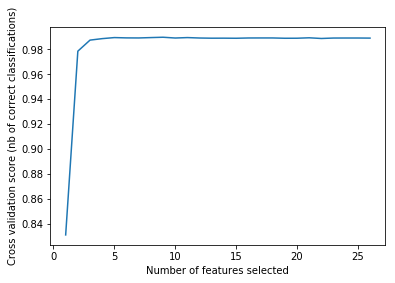

In [46]:
# 特征选择
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
svc = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(data_label_X, data_label_y)
print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features names: %s" % data_label_X.columns[rfecv.ranking_-1])
print("Ranking of features nums: %s" % rfecv.ranking_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig("feature.jpg")
plt.show()

In [47]:
import pandas as pd
import numpy as np  
from sklearn.ensemble import RandomForestRegressor
import pickle  
import matplotlib.pyplot as plt
import matplotlib
import time
from sklearn import preprocessing

In [48]:
data_x_scaled = preprocessing.scale(data_label_X)

In [49]:
t = time.time()
for i in range(10):                           #这里我们进行十次循环取交集  
    tmp = set()  
    rfc =  RandomForestRegressor()
    rfc.fit(data_x_scaled, data_label_y)
    print("training finished")  
  
    importances = rfc.feature_importances_  
    indices = np.argsort(importances)[::-1]   # 倒序排列
    for f in range(data_x_scaled.shape[1]):     #shape[0]和shape[1]分别代表行和列的长度
        if f < 20:                            #选出前12个重要的特征
            tmp.add(data_label_X.columns[indices[f]])   #index，为行索引     columns，为列名称（label）
        print("%2d) %-*s %f" % (f + 1, 30, data_label_X.columns[indices[f]], importances[indices[f]]))
  
    selected_feat_names = tmp  
    print(len(selected_feat_names), "features are selected")  

print('花费时间：%.2fs' %(time.time()-t))

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.358775
 2) pitch1_moto_tmp                0.158342
 3) pitch1_angle                   0.115133
 4) yaw_position                   0.083716
 5) pitch2_moto_tmp                0.064595
 6) pitch1_ng5_tmp                 0.044759
 7) pitch3_angle                   0.038980
 8) generator_speed                0.035770
 9) power                          0.031997
10) pitch2_angle                   0.025672
11) pitch3_moto_tmp                0.022716
12) int_tmp                        0.012120
13) pitch2_ng5_tmp                 0.002364
14) wind_speed                     0.001710
15) wind_direction                 0.001238
16) pitch3_ng5_tmp                 0.000592
17) yaw_speed                      0.000362
18) pitch2_ng5_DC                  0.000327
19) pitch1_ng5_DC                  0.000246
20) pitch3_ng5_DC                  0.000193
21) acc_x                          0.000110
22) acc_y                          0.000091
23) wind_direc

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.371761
 2) pitch1_moto_tmp                0.154783
 3) pitch1_angle                   0.111601
 4) yaw_position                   0.086831
 5) pitch2_moto_tmp                0.064742
 6) pitch1_ng5_tmp                 0.045645
 7) pitch3_angle                   0.041060
 8) power                          0.031966
 9) generator_speed                0.029014
10) pitch3_moto_tmp                0.021858
11) pitch2_angle                   0.018418
12) int_tmp                        0.014823
13) pitch2_ng5_tmp                 0.002573
14) wind_speed                     0.001823
15) pitch3_ng5_tmp                 0.000842
16) wind_direction                 0.000739
17) pitch2_ng5_DC                  0.000412
18) yaw_speed                      0.000331
19) pitch1_ng5_DC                  0.000211
20) wind_direction_mean            0.000183
21) acc_y                          0.000116
22) acc_x                          0.000108
23) pitch3_ng5

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.368767
 2) pitch1_moto_tmp                0.159416
 3) pitch1_angle                   0.108998
 4) yaw_position                   0.084957
 5) pitch2_moto_tmp                0.059718
 6) pitch1_ng5_tmp                 0.044321
 7) pitch3_angle                   0.039338
 8) pitch3_moto_tmp                0.030210
 9) generator_speed                0.027629
10) power                          0.027451
11) pitch2_angle                   0.023086
12) int_tmp                        0.019214
13) pitch2_ng5_tmp                 0.001880
14) wind_speed                     0.001407
15) wind_direction                 0.001188
16) yaw_speed                      0.000712
17) pitch3_ng5_tmp                 0.000449
18) pitch2_ng5_DC                  0.000418
19) pitch1_ng5_DC                  0.000264
20) wind_direction_mean            0.000168
21) pitch3_ng5_DC                  0.000150
22) acc_x                          0.000135
23) acc_y     

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.367301
 2) pitch1_moto_tmp                0.153972
 3) yaw_position                   0.094245
 4) pitch1_angle                   0.093077
 5) pitch2_moto_tmp                0.062231
 6) power                          0.045248
 7) pitch3_angle                   0.043167
 8) pitch1_ng5_tmp                 0.042858
 9) pitch2_angle                   0.028861
10) pitch3_moto_tmp                0.024667
11) int_tmp                        0.020561
12) generator_speed                0.016796
13) pitch2_ng5_tmp                 0.001971
14) wind_speed                     0.001965
15) pitch3_ng5_tmp                 0.001007
16) wind_direction                 0.000806
17) pitch2_ng5_DC                  0.000385
18) wind_direction_mean            0.000277
19) yaw_speed                      0.000136
20) pitch3_ng5_DC                  0.000120
21) acc_x                          0.000115
22) acc_y                          0.000107
23) pitch1_ng5

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.367320
 2) pitch1_moto_tmp                0.158609
 3) pitch1_angle                   0.107655
 4) yaw_position                   0.083695
 5) pitch2_moto_tmp                0.063233
 6) pitch1_ng5_tmp                 0.044535
 7) pitch3_angle                   0.039506
 8) generator_speed                0.035903
 9) power                          0.029255
10) pitch3_moto_tmp                0.026551
11) pitch2_angle                   0.019043
12) int_tmp                        0.017518
13) wind_speed                     0.001929
14) pitch2_ng5_tmp                 0.001590
15) wind_direction                 0.001225
16) pitch3_ng5_tmp                 0.000770
17) pitch2_ng5_DC                  0.000686
18) pitch1_ng5_DC                  0.000299
19) yaw_speed                      0.000262
20) wind_direction_mean            0.000094
21) pitch3_ng5_DC                  0.000093
22) pitch1_speed                   0.000078
23) acc_y     

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.364494
 2) pitch1_moto_tmp                0.154458
 3) pitch1_angle                   0.108871
 4) yaw_position                   0.080902
 5) pitch2_moto_tmp                0.066211
 6) pitch1_ng5_tmp                 0.044955
 7) pitch3_angle                   0.039080
 8) generator_speed                0.038136
 9) power                          0.029653
10) pitch3_moto_tmp                0.028177
11) pitch2_angle                   0.023597
12) int_tmp                        0.015081
13) pitch2_ng5_tmp                 0.001844
14) wind_direction                 0.001136
15) wind_speed                     0.001129
16) pitch3_ng5_tmp                 0.000824
17) pitch2_ng5_DC                  0.000486
18) yaw_speed                      0.000239
19) pitch3_ng5_DC                  0.000202
20) pitch1_ng5_DC                  0.000160
21) wind_direction_mean            0.000148
22) acc_x                          0.000122
23) pitch1_spe

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.372349
 2) pitch1_moto_tmp                0.160724
 3) pitch1_angle                   0.101322
 4) yaw_position                   0.079419
 5) pitch2_moto_tmp                0.062301
 6) pitch1_ng5_tmp                 0.046514
 7) pitch3_angle                   0.040909
 8) power                          0.037611
 9) pitch3_moto_tmp                0.025926
10) pitch2_angle                   0.025127
11) generator_speed                0.020721
12) int_tmp                        0.020209
13) pitch2_ng5_tmp                 0.001891
14) pitch3_ng5_tmp                 0.001388
15) wind_speed                     0.001149
16) wind_direction                 0.000844
17) pitch2_ng5_DC                  0.000493
18) yaw_speed                      0.000330
19) acc_y                          0.000195
20) pitch3_ng5_DC                  0.000161
21) wind_direction_mean            0.000151
22) pitch1_ng5_DC                  0.000133
23) acc_x     

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.372595
 2) pitch1_moto_tmp                0.152592
 3) pitch1_angle                   0.110678
 4) yaw_position                   0.078264
 5) pitch2_moto_tmp                0.068572
 6) pitch1_ng5_tmp                 0.045203
 7) power                          0.040814
 8) pitch3_angle                   0.040118
 9) generator_speed                0.029625
10) pitch3_moto_tmp                0.026830
11) pitch2_angle                   0.014135
12) int_tmp                        0.012995
13) wind_speed                     0.002020
14) pitch2_ng5_tmp                 0.001648
15) pitch3_ng5_tmp                 0.001500
16) wind_direction                 0.000990
17) yaw_speed                      0.000380
18) pitch2_ng5_DC                  0.000360
19) wind_direction_mean            0.000206
20) acc_y                          0.000125
21) pitch1_ng5_DC                  0.000108
22) pitch3_ng5_DC                  0.000108
23) acc_x     

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.359002
 2) pitch1_moto_tmp                0.155931
 3) pitch1_angle                   0.120017
 4) yaw_position                   0.078390
 5) pitch2_moto_tmp                0.074628
 6) generator_speed                0.045030
 7) pitch1_ng5_tmp                 0.043855
 8) pitch3_angle                   0.041639
 9) power                          0.035723
10) pitch2_angle                   0.015211
11) pitch3_moto_tmp                0.012251
12) int_tmp                        0.010993
13) pitch2_ng5_tmp                 0.001997
14) wind_speed                     0.001732
15) pitch3_ng5_tmp                 0.000965
16) wind_direction                 0.000731
17) yaw_speed                      0.000476
18) pitch2_ng5_DC                  0.000447
19) wind_direction_mean            0.000262
20) pitch3_ng5_DC                  0.000232
21) pitch1_ng5_DC                  0.000209
22) acc_x                          0.000173
23) pitch1_spe

D:\Work\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training finished
 1) environment_tmp                0.371913
 2) pitch1_moto_tmp                0.151773
 3) pitch1_angle                   0.113655
 4) yaw_position                   0.087038
 5) pitch2_moto_tmp                0.061567
 6) pitch1_ng5_tmp                 0.046019
 7) pitch3_angle                   0.039382
 8) power                          0.036752
 9) pitch3_moto_tmp                0.027164
10) generator_speed                0.023422
11) pitch2_angle                   0.018819
12) int_tmp                        0.015308
13) pitch2_ng5_tmp                 0.001839
14) wind_speed                     0.001413
15) wind_direction                 0.001345
16) pitch3_ng5_tmp                 0.001187
17) yaw_speed                      0.000366
18) pitch2_ng5_DC                  0.000348
19) wind_direction_mean            0.000217
20) acc_y                          0.000143
21) pitch3_ng5_DC                  0.000111
22) acc_x                          0.000100
23) pitch1_ng5

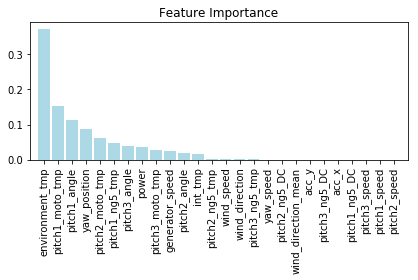

In [50]:
plt.title("Feature Importance")  
plt.bar(range(data_x_scaled.shape[1]),
        importances[indices],  
        color='lightblue',  
        align='center')  
plt.xticks(range(data_x_scaled.shape[1]),
           data_label_X.columns[indices],
           rotation=90)  
plt.xlim([-1, data_x_scaled.shape[1]])
plt.tight_layout()  
plt.show() 

In [51]:
data_label_X.columns[indices]

Index(['environment_tmp', 'pitch1_moto_tmp', 'pitch1_angle', 'yaw_position',
       'pitch2_moto_tmp', 'pitch1_ng5_tmp', 'pitch3_angle', 'power',
       'pitch3_moto_tmp', 'generator_speed', 'pitch2_angle', 'int_tmp',
       'pitch2_ng5_tmp', 'wind_speed', 'wind_direction', 'pitch3_ng5_tmp',
       'yaw_speed', 'pitch2_ng5_DC', 'wind_direction_mean', 'acc_y',
       'pitch3_ng5_DC', 'acc_x', 'pitch1_ng5_DC', 'pitch3_speed',
       'pitch1_speed', 'pitch2_speed'],
      dtype='object')

In [52]:
data_label_X.columns[indices][0:rfecv.n_features_]

Index(['environment_tmp', 'pitch1_moto_tmp', 'pitch1_angle', 'yaw_position',
       'pitch2_moto_tmp', 'pitch1_ng5_tmp', 'pitch3_angle', 'power',
       'pitch3_moto_tmp'],
      dtype='object')

In [53]:
data_15 = data_15[data_label_X.columns[indices][0:rfecv.n_features_]]
data_21 = data_21[data_label_X.columns[indices][0:rfecv.n_features_]]

In [54]:
data_15

,environment_tmp,pitch1_moto_tmp,pitch1_angle,yaw_position,pitch2_moto_tmp,pitch1_ng5_tmp,pitch3_angle,power,pitch3_moto_tmp
358158,-1.084063,-2.179,0.222222,-0.672816,-2.210,1.167692,0.222222,0.176879,-2.150
81507,0.148403,-0.690,0.355556,-0.370142,-0.690,0.615385,0.337778,-1.037324,-0.680
237814,-1.084063,-1.650,0.222222,0.596074,-1.650,1.215385,0.222222,-0.478930,-1.639
158949,-1.525921,-1.900,0.328889,-0.538952,-1.889,0.721538,0.342222,-0.999290,-1.879
241128,-0.640628,-1.450,0.217778,0.671742,-1.450,1.013846,0.208889,-1.009296,-1.439
108070,-0.153007,-1.039,0.328889,-0.335196,-1.050,1.076923,0.337778,-0.360774,-1.019
18210,0.779628,-0.900,0.351111,0.031449,-0.889,0.738462,0.333333,-0.633128,-0.880
22029,0.746488,-0.450,0.244444,1.632181,-0.469,0.629231,0.324444,-0.729232,-0.459
333376,-0.815793,-1.550,0.195556,-0.434162,-1.560,1.260000,0.217778,0.120801,-1.530
231802,-0.956240,-1.389,0.222222,0.945341,-1.380,1.090769,0.204444,-0.955233,-1.380


In [55]:
data_15_x = data_15.iloc[:,0:-1]
data_15_y = label[0:data_15.shape[0]]
data_21_x = data_21.iloc[:,0:-1]
data_21_y = label[data_15.shape[0]:]

In [56]:
from sklearn.model_selection import train_test_split
# 在选择的数据中，选择2/3作为训练集，1/3作为测试集
X_15_train, X_15_test, y_15_train, y_15_test = train_test_split(data_15_x, data_15_y, test_size=0.33,random_state=0)
X_21_train, X_21_test, y_21_train, y_21_test = train_test_split(data_21_x, data_21_y, test_size=0.33,random_state=0)

In [57]:
from sklearn import svm
svc_model = svm.SVC(C=5, kernel='rbf', gamma=0.1,probability=True,random_state=0)
svc_model.fit(X_15_train,y_15_train)
svc_model.fit(X_21_train,y_21_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
scores_15 = cross_val_score(svc_model,X_15_train,y_15_train,cv=5,scoring='accuracy')
scores_21 = cross_val_score(svc_model,X_21_train,y_21_train,cv=5,scoring='accuracy')
y_15_pred = svc_model.predict(X_15_test)
y_21_pred = svc_model.predict(X_21_test)

In [59]:
print('15号风机十折交叉验证验证集平均准确率: ', scores_15.mean())
print('15号风机测试集准确率: ', accuracy_score(y_15_test, svc_model.fit(X_15_train,y_15_train).predict(X_15_test)))

print('21号十折交叉验证验证集平均准确率: ', scores_21.mean())
print('21号测试集准确率: ', accuracy_score(y_21_test, svc_model.fit(X_21_train,y_21_train).predict(X_21_test)))

15号风机十折交叉验证验证集平均准确率:  0.826537546721033
15号风机测试集准确率:  0.8208955223880597
21号十折交叉验证验证集平均准确率:  0.9486105690243833
21号测试集准确率:  0.9529240661359462


In [60]:
print('15号风机训练，21号测试准确率: ', accuracy_score(y_21_test, svc_model.fit(X_15_train,y_15_train).predict(X_21_test)))

15号风机训练，21号测试准确率:  0.8148346601347214


In [61]:
print('21号风机训练，15号测试准确率: ', accuracy_score(y_15_test, svc_model.fit(X_21_train,y_21_train).predict(X_15_test)))

21号风机训练，15号测试准确率:  0.5074626865671642


In [62]:
data = pd.concat([data_15,data_21],axis=0)

In [63]:
data.head()

,environment_tmp,pitch1_moto_tmp,pitch1_angle,yaw_position,pitch2_moto_tmp,pitch1_ng5_tmp,pitch3_angle,power,pitch3_moto_tmp
358158,-1.084063,-2.179,0.222222,-0.672816,-2.210,1.167692,0.222222,0.176879,-2.150
81507,0.148403,-0.690,0.355556,-0.370142,-0.690,0.615385,0.337778,-1.037324,-0.680
237814,-1.084063,-1.650,0.222222,0.596074,-1.650,1.215385,0.222222,-0.478930,-1.639
158949,-1.525921,-1.900,0.328889,-0.538952,-1.889,0.721538,0.342222,-0.999290,-1.879
241128,-0.640628,-1.450,0.217778,0.671742,-1.450,1.013846,0.208889,-1.009296,-1.439


In [64]:
minmax_scaler = MinMaxScaler() # 建立MinMaxScaler模型对象
data_scaled = minmax_scaler.fit_transform(data) # MinMaxScaler标准化处理

In [65]:
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(2, 10):  # 遍历从2到10几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # 建立聚类模型对象
    cluster_labels_tmp = model_kmeans.fit_predict(data_scaled)  # 训练聚类模型
    silhouette_tmp = metrics.silhouette_score(data_scaled, cluster_labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 将最好的K存储下来
        silhouette_int = silhouette_tmp  # 将最好的平均轮廓得分存储下来
        best_kmeans = model_kmeans  # 将最好的模型存储下来
        cluster_labels_k = cluster_labels_tmp  # 将最好的聚类标签存储下来
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表

In [66]:
print (np.array(score_list))  # 打印输出所有K下的详细得分

[[2.         0.24507968]
 [3.         0.26865761]
 [4.         0.26238765]
 [5.         0.25457746]
 [6.         0.2512862 ]
 [7.         0.25191633]
 [8.         0.25201515]
 [9.         0.2574423 ]]


In [67]:
print ('Best K is:{0} with average silhouette of {1}'.format(best_k, silhouette_int.round(4)))

Best K is:3 with average silhouette of 0.2687


In [68]:
cluster_labels_k

array([0, 2, 0, ..., 2, 1, 2])

In [69]:
data.shape

(40397, 9)

In [70]:
data['cluster'] = cluster_labels_k

In [71]:
data['label'] = label

In [72]:
data

,environment_tmp,pitch1_moto_tmp,pitch1_angle,yaw_position,pitch2_moto_tmp,pitch1_ng5_tmp,pitch3_angle,power,pitch3_moto_tmp,cluster,label
358158,-1.084063,-2.179,0.222222,-0.672816,-2.210,1.167692,0.222222,0.176879,-2.150,0,0
81507,0.148403,-0.690,0.355556,-0.370142,-0.690,0.615385,0.337778,-1.037324,-0.680,2,0
237814,-1.084063,-1.650,0.222222,0.596074,-1.650,1.215385,0.222222,-0.478930,-1.639,0,0
158949,-1.525921,-1.900,0.328889,-0.538952,-1.889,0.721538,0.342222,-0.999290,-1.879,0,0
241128,-0.640628,-1.450,0.217778,0.671742,-1.450,1.013846,0.208889,-1.009296,-1.439,0,0
108070,-0.153007,-1.039,0.328889,-0.335196,-1.050,1.076923,0.337778,-0.360774,-1.019,0,0
18210,0.779628,-0.900,0.351111,0.031449,-0.889,0.738462,0.333333,-0.633128,-0.880,2,0
22029,0.746488,-0.450,0.244444,1.632181,-0.469,0.629231,0.324444,-0.729232,-0.459,2,0
333376,-0.815793,-1.550,0.195556,-0.434162,-1.560,1.260000,0.217778,0.120801,-1.530,0,0
231802,-0.956240,-1.389,0.222222,0.945341,-1.380,1.090769,0.204444,-0.955233,-1.380,0,0


In [73]:
data_15 = data[0:data_15.shape[0]]

In [74]:
data_21 = data[data_15.shape[0]:]

In [75]:
data_15

,environment_tmp,pitch1_moto_tmp,pitch1_angle,yaw_position,pitch2_moto_tmp,pitch1_ng5_tmp,pitch3_angle,power,pitch3_moto_tmp,cluster,label
358158,-1.084063,-2.179,0.222222,-0.672816,-2.210,1.167692,0.222222,0.176879,-2.150,0,0
81507,0.148403,-0.690,0.355556,-0.370142,-0.690,0.615385,0.337778,-1.037324,-0.680,2,0
237814,-1.084063,-1.650,0.222222,0.596074,-1.650,1.215385,0.222222,-0.478930,-1.639,0,0
158949,-1.525921,-1.900,0.328889,-0.538952,-1.889,0.721538,0.342222,-0.999290,-1.879,0,0
241128,-0.640628,-1.450,0.217778,0.671742,-1.450,1.013846,0.208889,-1.009296,-1.439,0,0
108070,-0.153007,-1.039,0.328889,-0.335196,-1.050,1.076923,0.337778,-0.360774,-1.019,0,0
18210,0.779628,-0.900,0.351111,0.031449,-0.889,0.738462,0.333333,-0.633128,-0.880,2,0
22029,0.746488,-0.450,0.244444,1.632181,-0.469,0.629231,0.324444,-0.729232,-0.459,2,0
333376,-0.815793,-1.550,0.195556,-0.434162,-1.560,1.260000,0.217778,0.120801,-1.530,0,0
231802,-0.956240,-1.389,0.222222,0.945341,-1.380,1.090769,0.204444,-0.955233,-1.380,0,0


In [76]:
data_21

,environment_tmp,pitch1_moto_tmp,pitch1_angle,yaw_position,pitch2_moto_tmp,pitch1_ng5_tmp,pitch3_angle,power,pitch3_moto_tmp,cluster,label
19694,0.621821,-0.960,0.364444,0.456386,-0.930,0.815385,0.360000,-0.278684,-0.969,2,0
82181,0.209947,-0.700,0.222222,-1.353878,-0.669,1.384615,0.195556,-0.581057,-0.690,2,0
70924,1.425055,-0.370,0.204444,-1.557586,-0.340,0.815385,0.208889,-0.647142,-0.370,2,0
153655,-0.561725,-1.700,0.360000,0.246806,-1.670,1.246154,0.337778,0.046702,-1.700,0,0
104504,0.446657,-0.939,0.355556,-1.313108,-0.900,0.907692,0.333333,0.756621,-0.930,1,0
177810,0.574480,-0.400,0.217778,0.468034,-0.419,0.783077,0.222222,0.449210,-0.419,1,0
146596,-1.683727,-1.989,0.204444,-0.428338,-1.970,0.753846,0.217778,-0.987268,-1.989,0,0
135069,-0.452839,-1.150,0.217778,0.281752,-1.089,1.353846,0.164444,0.625436,-1.130,0,0
93827,-0.184568,-0.889,0.208889,-1.656552,-0.830,0.644615,0.222222,-0.991275,-0.850,2,0
78902,1.458194,-0.650,0.222222,-1.348054,-0.640,1.061538,0.195556,-0.559029,-0.640,2,0


In [77]:
data_15_0 = data_15[data_15.cluster==0]
data_15_1 = data_15[data_15.cluster==1]
data_15_2 = data_15[data_15.cluster==2]

In [78]:
data_21_0 = data_21[data_21.cluster==0]
data_21_1 = data_21[data_21.cluster==1]
data_21_2 = data_21[data_21.cluster==2]

In [79]:
data_15_0.drop(columns='cluster',axis=1,inplace=True)
data_15_1.drop(columns='cluster',axis=1,inplace=True)
data_15_2.drop(columns='cluster',axis=1,inplace=True)
data_21_0.drop(columns='cluster',axis=1,inplace=True)
data_21_1.drop(columns='cluster',axis=1,inplace=True)
data_21_2.drop(columns='cluster',axis=1,inplace=True)

D:\Work\anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
data_15_0_X = data_15_0.iloc[:,0:-1]
data_15_0_y = data_15_0.iloc[:,-1]
data_15_1_X= data_15_1.iloc[:,0:-1]
data_15_1_y= data_15_1.iloc[:,-1]
data_15_2_X= data_15_2.iloc[:,0:-1]
data_15_2_y= data_15_2.iloc[:,-1]
data_21_0_X = data_21_0.iloc[:,0:-1]
data_21_0_y = data_21_0.iloc[:,-1]
data_21_1_X = data_21_1.iloc[:,0:-1]
data_21_1_y = data_21_1.iloc[:,-1]
data_21_2_X = data_21_2.iloc[:,0:-1]
data_21_2_y = data_21_2.iloc[:,-1]

In [81]:
svc_model = svm.SVC(C=5, kernel='rbf', gamma=0.1,probability=True,random_state=0)

In [82]:
print('21号风机训练，15号测试准确率: ', accuracy_score(data_15_0_y, svc_model.fit(data_21_0_X,data_21_0_y).predict(data_15_0_X)))

21号风机训练，15号测试准确率:  0.5420560747663551


In [83]:
print('21号风机训练，15号测试准确率: ', accuracy_score(data_15_1_y, svc_model.fit(data_21_1_X,data_21_1_y).predict(data_15_1_X)))

21号风机训练，15号测试准确率:  0.8809523809523809


In [84]:
print('21号风机训练，15号测试准确率: ', accuracy_score(data_15_2_y, svc_model.fit(data_21_2_X,data_21_2_y).predict(data_15_2_X)))

21号风机训练，15号测试准确率:  0.6111111111111112
